## BM 336546 - HW2: Adi and Efrat

### Theory Questions-

##### Q1-
Model performance is more important evaluation metric than accuracy. 
Accuracy does not work well when there are unequal number of samples belonging to each class, which is the case in most datasets, classification accuracy can give us the false sense of achieving high accuracy resulting from imbalanced classes. Model performance is our way to know how good our model would be with new data. If the model accuracy is good and the performance is not, it means that our model can only work with the original training dataset. 
For example a cancer detection model. Let’s say out of 100, 90 of the patients don’t have cancer and the remaining 10 have it. Detecting everyone as not having cancer gives an accuracy of 90% but misses the patients that are sick and need treatment.

##### Q2-
The pros in using only BP and BMI features is that we are training a classifier with the most relevant features that can predict a heart attack, it is easier to visualize the data with less features and the computing time would be faster. The cons of this model is that we can miss relevant data by not using all of the features, thus compromising the model performance.
The pros in using all of the features is that we have more information for each patient and we could predict better whether a patient is going to suffer a heart attack or not. The cons of this classifier is that some of the features can be irrelevant or redundant, too many features can obstruct interpretability and be computationaly expensive.

##### Q3-
It depends.. SVM works well with unstructured and semi-structured data like text and images, it is based on geometrical properties of the data and there is a lower risk of overfitting.
If it is difficult to distinguish the biopsies by looking at the features it can indicate that the features are not linearly seperable, thus SVM (the kernel trick) can make the data separable.
If we have a high number of features non-linear SVM can be computationally expensive and might lead to
overfitting, linear SVM could make the data seperable in a higer dimension.

##### Q4- 
SVM tries to finds the best margin that separates the classes and thus reduces the risk of error on the data, while logistic regression can have different decision boundaries with different weights that are near the optimal point. LR works well with already identified independent variables and SVM with unstructured and semi-structured data. LR is based on statistical approaches while SVM is based on geometrical properties of the data. Moreover, LR is more vulnerable to overfitting than SVM.
Logistic regression does't have many hyperparameters to tune. We can improve performance by using different solvers or regularization (penalty). SVM provides larger number of hyperparameters to tune, like the choice of kernel that controls the projection of the variables, the penalty (C) that controls the trade-off between decision boundary and misclassification term and gamma which decides how much curvature we want in a decision boundary.

## Coding Assignment-

#### 1. Loading the data and preprocessing:

In [1]:
import pandas as pd 
import numpy as np
from pathlib import Path
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
random.seed(10)
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
file = Path.cwd().joinpath('HW2_data.csv') # concatenates HW2_data.csv to the current folder
T1D_dataset = pd.read_csv(file) # load the data
T1D_dataset = T1D_dataset.dropna() #removing patients with missing values

#section 4 - converting the data to one hot vector
T1D_dataset = pd.get_dummies(data=T1D_dataset,prefix=None, drop_first=True) #dummy coding - converting the data to binary

T1D_features = T1D_dataset[['Age','Gender_Male','Increased Urination_Yes','Increased Thirst_Yes','Sudden Weight Loss_Yes','Weakness_Yes','Increased Hunger_Yes',
                              'Genital Thrush_Yes','Visual Blurring_Yes','Itching_Yes','Irritability_Yes','Delayed Healing_Yes','Partial Paresis_Yes',
                              'Muscle Stiffness_Yes','Hair Loss_Yes','Obesity_Yes','Family History']]
diagnosis = T1D_dataset[['Diagnosis_Positive']]

#### 2. Train-test split:

In [3]:
x_train, x_test, y_train, y_test = train_test_split(T1D_features, np.ravel(diagnosis), test_size=0.2, random_state=0, stratify=np.ravel(diagnosis))

#### 3. Data visualization:

In [ ]:
dic_train = {}
dic_test = {}
dic_delta = {}
units = []
for col in T1D_features.columns:        
    dic_train[col] = round(100 * sum(x_train[col])/len(x_train[col]),2)
    dic_test[col] = round(100 * sum(x_test[col])/len(x_test[col]),2)
    dic_delta[col] = dic_train[col] - dic_test[col]
    units.append('%')
dic_train['Age'] = round(sum(x_train['Age'])/len(x_train['Age']),2)
dic_test['Age'] = round(sum(x_test['Age'])/len(x_test['Age']),2)
dic_delta['Age'] = dic_train['Age'] - dic_test['Age']
units[0] = 'years'
table = pd.DataFrame(dic_train.items(), columns=['Feature','Train'])
df_test = pd.DataFrame(dic_test.items(), columns=['Feature','Test'])
df_delta = pd.DataFrame(dic_delta.items(), columns=['Feature','Delta'])
table['Test'] = df_test['Test']
table['Delta'] = df_delta['Delta']
table['units'] = units
print(table)

In [ ]:
bins = 50
feat = 'Age'
idx_1 = (diagnosis == 0).index[(diagnosis == 0)['Diagnosis_Positive'] == True].tolist()
idx_2 = (diagnosis == 1).index[(diagnosis == 1)['Diagnosis_Positive'] == True].tolist()
plt.hist(T1D_features[feat].loc[idx_1], bins, alpha=0.5, label='Negative')
plt.hist(T1D_features[feat].loc[idx_2], bins, alpha=0.5, label='Positive')
plt.xlabel(feat)
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

In [ ]:
bins = 20
idx_1 = (diagnosis == 0).index[(diagnosis == 0)['Diagnosis_Positive'] == True].tolist()
idx_2 = (diagnosis == 1).index[(diagnosis == 1)['Diagnosis_Positive'] == True].tolist()
fig, axs = plt.subplots(4,4,figsize=(25,28))
i,j = [0, 0]
for col in T1D_features.columns:
    if col!='Age':
        axs[i,j].hist(T1D_features[col].loc[idx_1], bins, label='Negative', align='left')
        axs[i,j].hist(T1D_features[col].loc[idx_2], bins, label='Positive',align='right')
        axs[i,j].set_title(col)
        axs[i,j].set(xlabel=col,ylabel='count')
        axs[i,j].legend(loc='upper right',fontsize=14)
        j+=1
        if (j>3):
            i+=1
            j=0
plt.show()

In [ ]:
diagnosis.value_counts().plot(kind="pie", labels=['T1D','NO T1D'], colors = ['steelblue', 'lightgreen'], autopct='%1.1f%%', ylabel='Type 1 Diabetes') 
plt.show()

#### 5. Machine Learning Models:

In [4]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)

scaler = StandardScaler()

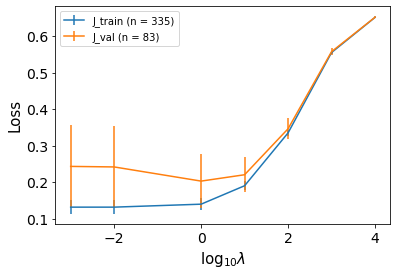

In [5]:
lmbda = np.array([0.001, 0.01, 1, 10, 100, 1000, 10000])
J_train = np.zeros((2,len(lmbda)))
J_val = np.zeros((2,len(lmbda)))

for idx, lmb in enumerate(lmbda):
    C = 1/lmb
    log_reg = LogisticRegression(solver='saga', random_state=5, penalty='l2', C=C, max_iter=2000)
    h = 0 # index per split per lambda
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits)
    
    for train_index, val_index in skf.split(x_train, y_train):
        x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        x_train_fold = scaler.fit_transform(x_train_fold)
        x_val_fold = scaler.transform(x_val_fold)
        log_reg.fit(x_train_fold, y_train_fold)
        y_pred_train = log_reg.predict_proba(x_train_fold)
        J_train_fold[h] = log_loss(y_train_fold, y_pred_train)
        y_pred_val = log_reg.predict_proba(x_val_fold)
        J_val_fold[h] = log_loss(y_val_fold, y_pred_val)
        h += 1
        
    J_train[0, idx] = J_train_fold.mean()
    J_train[1, idx] = J_train_fold.std()
    J_val[0, idx] = J_val_fold.mean()
    J_val[1, idx] = J_val_fold.std()

plt.errorbar(np.log10(lmbda), J_train[0,:], yerr=J_train[1,:])
plt.errorbar(np.log10(lmbda), J_val[0,:], yerr=J_val[1,:]) 
plt.xlabel('$\log_{10}\lambda$')
plt.ylabel('Loss')
plt.legend(['J_train (n = ' + str(x_train_fold.shape[0]) + ')', 'J_val (n = ' + str(x_val_fold.shape[0]) + ')'])

In [6]:
solver = 'saga' #or 'liblinear'
log_reg = LogisticRegression(random_state=5, max_iter=2000,solver=solver)
lmbda = np.array([0.01, 0.01, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('scale', StandardScaler()), ('logistic', log_reg)])
clf = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': ['l2']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=3, return_train_score=True)
clf.fit(x_train, y_train)
clf.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.943, test=0.940), f1=(train=0.953, test=0.952), precision=(train=0.965, test=0.943), recall=(train=0.941, test=0.962), roc_auc=(train=0.984, test=0.990), total=   0.1s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.955, test=0.881), f1=(train=0.964, test=0.900), precision=(train=0.961, test=0.938), recall=(train=0.966, test=0.865), roc_auc=(train=0.992, test=0.953), total=   0.1s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.961, test=0.893), f1=(train=0.969, test=0.909), precision=(train=0.966, test=0.938), recall=(train=0.971, test=0.882), roc_auc=(train=0.991, test=0.952), total=   0.1s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.955, test=0.928), f1=(train=0.963, test=0.943), precision=(train=0.970, test=0.909), recall=(train=0.956, test=0.980), roc_auc=(train=0.988, test=0.975), total=   0.1s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.949, test=0.964), f1=(train=0.958, test=0.971), precision=(train=0.975, test=0.962), recall=(train=0.942, test=0.980), roc_auc=(train=0.983, test=0.993), total=   0.1s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.943, test=0.940), f1=(train=0.953, test=0.952), precision=(train=0.965, test=0.943), recall=(train=0.941, test=0.962), roc_auc=(train=0.984, test=0.990), total=   0.1s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.955, test=0.881), f1=(t

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.1s finished


{'logistic__C': 0.1, 'logistic__penalty': 'l2'}

In [7]:
def max_data_ratio(n_splits,x_train,y_train):
    data_ratio_orig = np.linspace(0.01,0.98,num=100) 
    k_min = 0
    m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size =1-data_ratio_orig[k_min], random_state = 10,
                                     stratify=y_train)  
    while (m_x_train[m_y_train>0.5].shape[0] <= n_splits) or (m_x_train[m_y_train<0.5].shape[0] <= n_splits):
        k_min += 1
        m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size =1-data_ratio_orig[k_min], random_state = 10,
                                 stratify=y_train)  
    k_max = 99
    m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size =1-data_ratio_orig[k_max], random_state = 10,
                                     stratify=y_train)  
    while (m_x_train[m_y_train>0.5].shape[0] <= n_splits) or (m_x_train[m_y_train<0.5].shape[0] <= n_splits):
        k_max -= 1
        m_x_train, _, m_y_train, _ = train_test_split(x_train, y_train, test_size =1-data_ratio_orig[k_max], random_state = 10,
                                 stratify=y_train)
    return np.linspace(data_ratio_orig[k_min],data_ratio_orig[k_max],num=100)

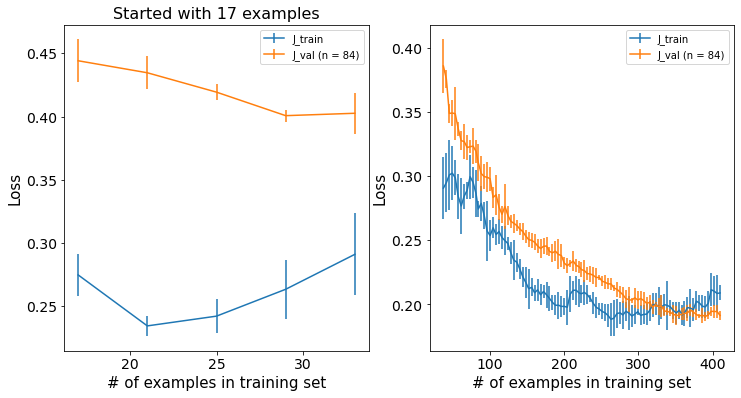

In [8]:
x_train_orig, x_val_orig, y_train_orig, y_val_orig= train_test_split(x_train, y_train, test_size = 0.20, random_state = 10, stratify=y_train)
data_ratio = max_data_ratio(n_splits, x_train, y_train)

J_train = np.zeros((2,len(data_ratio)))
J_val = np.zeros((2,len(data_ratio)))

for idx, curr_ratio in enumerate(data_ratio):
    log_reg = LogisticRegression(solver='saga', random_state=5, penalty='l2', C=0.1, max_iter=2000)
    h = 0 # index per split
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits)
    m_x_train, _, m_y_train, _ = train_test_split(x_train_orig, y_train_orig, test_size =1-curr_ratio, random_state = 10,
                                             stratify=y_train_orig)
    for train_index, val_index in skf.split(m_x_train, m_y_train):
        x_train_fold = m_x_train.iloc[train_index]
        y_train_fold = m_y_train[train_index]
        x_train_fold = scaler.fit_transform(x_train_fold)
        x_val = scaler.transform(x_val_orig)

        log_reg.fit(x_train_fold, y_train_fold)
        y_pred_train = log_reg.predict_proba(x_train_fold)
        J_train_fold[h] = log_loss(y_train_fold,y_pred_train)
        y_pred_val = log_reg.predict_proba(x_val)
        J_val_fold[h] = log_loss(y_val_orig,y_pred_val) 
        h += 1
        
        J_train[0, idx] = J_train_fold.mean()
        J_train[1, idx] = J_train_fold.std()
        J_val[0, idx] = J_val_fold.mean()
        J_val[1, idx] = J_val_fold.std()

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].errorbar(np.ceil(data_ratio[0:5]*x_train.shape[0]), J_train[0,0:5], yerr=J_train[1,0:5])
axes[0].errorbar(np.ceil(data_ratio[0:5]*x_train.shape[0]), J_val[0,0:5], yerr=J_val[1,0:5])
axes[0].set_xlabel('# of examples in training set')
axes[0].set_ylabel('Loss')
axes[0].legend(['J_train', 'J_val (n = ' + str(x_val.shape[0]) + ')'])
axes[0].set_title('Started with ' + str(int(np.ceil(data_ratio[0]*x_train.shape[0]))) + ' examples')
axes[1].errorbar(np.ceil(data_ratio[5:]*x_train.shape[0]), J_train[0,5:], yerr=J_train[1,5:])
axes[1].errorbar(np.ceil(data_ratio[5:]*x_train.shape[0]), J_val[0,5:], yerr=J_val[1,5:])
axes[1].set_xlabel('# of examples in training set')
axes[1].set_ylabel('Loss')
axes[1].legend(['J_train', 'J_val (n = ' + str(x_val.shape[0]) + ')'])

In [9]:
svc = SVC(probability=True)
C = np.array([0.01, 1, 10, 100, 1000])

pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_lin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['linear']},cv=skf,
                       scoring=['accuracy','f1','precision','recall','roc_auc'], 
                       refit='roc_auc', verbose=3, return_train_score=True)
svm_lin.fit(x_train, y_train)
best_svm_lin = svm_lin.best_estimator_
print(svm_lin.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.910, test=0.905), f1=(train=0.923, test=0.918), precision=(train=0.973, test=0.978), recall=(train=0.878, test=0.865), roc_auc=(train=0.978, test=0.992), total=   0.1s
[CV] svm__C=0.01, svm__kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.937, test=0.857), f1=(train=0.947, test=0.870), precision=(train=0.984, test=1.000), recall=(train=0.912, test=0.769), roc_auc=(train=0.988, test=0.954), total=   0.1s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.910, test=0.833), f1=(train=0.924, test=0.848), precision=(train=0.968, test=0.951), recall=(train=0.883, test=0.765), roc_auc=(train=0.981, test=0.967), total=   0.1s
[CV] svm__C=0.01, svm__kernel=linear .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.896, test=0.880), f1=(train=0.911, test=0.900), precision=(train=0.952, test=0.918), recall=(train=0.874, test=0.882), roc_auc=(train=0.979, test=0.979), total=   0.1s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.910, test=0.940), f1=(train=0.925, test=0.952), precision=(train=0.958, test=0.926), recall=(train=0.893, test=0.980), roc_auc=(train=0.977, test=0.988), total=   0.1s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.949, test=0.940), f1=(train=0.958, test=0.952), precision=(train=0.980, test=0.943), recall=(train=0.937, test=0.962), roc_auc=(train=0.980, test=0.984), total=   0.2s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.961, test=0.905), f1=(train=0.969, test=0.922), precision

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.5min finished


In [10]:
svc = SVC(probability=True)
C = np.array([0.01, 1, 10, 100, 1000])

pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_nonlin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'],
                                                      'svm__gamma': ['auto', 'scale']},
                       scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                       refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin.fit(x_train, y_train)
best_svm_nonlin = svm_nonlin.best_estimator_
print(svm_nonlin.best_params_)
svm_nonlin.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] svm__C=0.01, svm__gamma=auto, svm__kernel=rbf ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  svm__C=0.01, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.973, test=0.972), total=   0.1s
[CV] svm__C=0.01, svm__gamma=auto, svm__kernel=rbf ...................
[CV]  svm__C=0.01, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.975, test=0.962), total=   0.1s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s



[CV] svm__C=0.01, svm__gamma=auto, svm__kernel=rbf ...................
[CV]  svm__C=0.01, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.617, test=0.607), f1=(train=0.763, test=0.756), precision=(train=0.617, test=0.607), recall=(train=1.000, test=1.000), roc_auc=(train=0.977, test=0.936), total=   0.1s
[CV] svm__C=0.01, svm__gamma=auto, svm__kernel=rbf ...................
[CV]  svm__C=0.01, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.975, test=0.971), total=   0.1s
[CV] svm__C=0.01, svm__gamma=auto, svm__kernel=rbf ...................
[CV]  svm__C=0.01, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.970, test=0.990), total=   0.1s
[CV] svm__C=0.01, svm__gamma=auto, svm__kernel=poly .................

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.8s finished


{'svm__C': 1.0, 'svm__gamma': 'auto', 'svm__kernel': 'poly'}

In [11]:
calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

Logistic regression:
AUROC is 0.946
F1 is 0.91
Loss is 3.95
Accuracy is 0.89


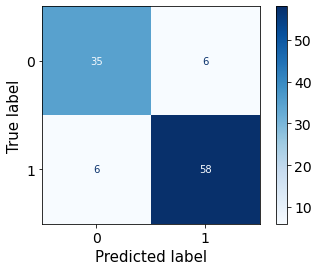

In [12]:
#Logistic regression
x_tr = scaler.fit_transform(x_train)
x_tst = scaler.transform(x_test)
log_reg.fit(x_tr, y_train)
y_pred_test_lr = log_reg.predict(x_tst)
y_pred_proba_test_lr = log_reg.predict_proba(x_tst)
loss = log_loss(y_test, y_pred_test_lr)

TN = calc_TN(y_test, y_pred_test_lr)
TP = calc_TP(y_test, y_pred_test_lr)
FN = calc_FN(y_test, y_pred_test_lr)
FP = calc_FP(y_test, y_pred_test_lr)
PPV = TP/(TP+FP)
Se = TP/(TP+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*PPV*Se)/(PPV+Se)
print('Logistic regression:')
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test_lr[:,1])))
print(f'F1 is {F1:.2f}')
print(f'Loss is {loss:.2f}')
print(f'Accuracy is {Acc:.2f}')
plot_confusion_matrix(log_reg, x_tst, y_test, cmap=plt.cm.Blues)
plt.grid(False)

In [ ]:
#linear SVM:
y_pred_test_svm_lin = best_svm_lin.predict(x_test)
y_pred_proba_test_svm_lin = best_svm_lin.predict_proba(x_test)
loss = log_loss(y_test, y_pred_proba_test_svm_lin)

TN = calc_TN(y_test, y_pred_test_svm_lin)
TP = calc_TP(y_test, y_pred_test_svm_lin)
FN = calc_FN(y_test, y_pred_test_svm_lin)
FP = calc_FP(y_test, y_pred_test_svm_lin)
PPV = TP/(TP+FP)
Se = TP/(TP+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*PPV*Se)/(PPV+Se)
print('Linear SVM:')
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test_svm_lin[:,1])))
print(f'F1 is {F1:.2f}')
print(f'Loss is {loss:.2f}')
print(f'Accuracy is {Acc:.2f}')
plot_confusion_matrix(svm_lin, x_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)

In [ ]:
#Non-linear SVM
y_pred_test_svm_nonlin = best_svm_nonlin.predict(x_test)
y_pred_proba_test_svm_nonlin = best_svm_nonlin.predict_proba(x_test)
loss = log_loss(y_test, y_pred_proba_test_svm_nonlin)
svm_params = svm_nonlin.best_params_
chosen_kernel = svm_params['svm__kernel']

TN = calc_TN(y_test, y_pred_test_svm_nonlin)
TP = calc_TP(y_test, y_pred_test_svm_nonlin)
FN = calc_FN(y_test, y_pred_test_svm_nonlin)
FP = calc_FP(y_test, y_pred_test_svm_nonlin)
PPV = TP/(TP+FP)
Se = TP/(TP+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*PPV*Se)/(PPV+Se)
print(f'Non-linear SVM - {chosen_kernel}:')
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test_svm_nonlin[:,1])))
print(f'F1 is {F1:.2f}')
print(f'Loss is {loss:.2f}')
print(f'Accuracy is {Acc:.2f}')
plot_confusion_matrix(svm_nonlin, x_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)

#### Section c- 
Non-linear model performs best on this dataset.

#### 6. Feature Selection:

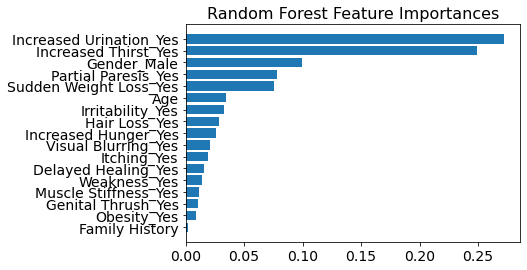

In [36]:
rfc = Pipeline(steps=[('scale', StandardScaler()), ('rfc', RandomForestClassifier(max_depth=4, random_state=0, criterion='gini'))])
rfc.fit(x_train, y_train)

tree_feature_importances = (rfc.named_steps['rfc'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()
feature_names = T1D_features.columns.values

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances")
plt.show()

##### i. The two most important features according to the random forest are: Increased Urination and Increased Thirst.
##### ii.  Yes it does match up to the feature exploration as can be seen in the histograms.

#### 7. Data Separability Visualization:

In [19]:
pca = PCA(whiten=True)
# apply PCA transformation
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [20]:
def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

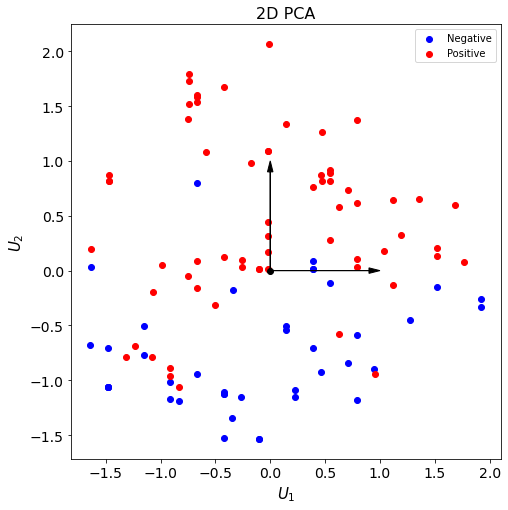

In [21]:
plt_2d_pca(x_test_pca,y_test)

In [22]:
pca = PCA(n_components = 2, whiten=True)
# apply PCA transformation
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

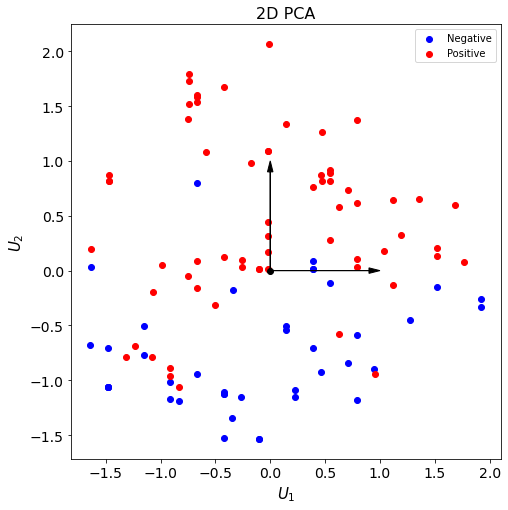

In [23]:
plt_2d_pca(x_test_pca,y_test)

#### section c: training the models:

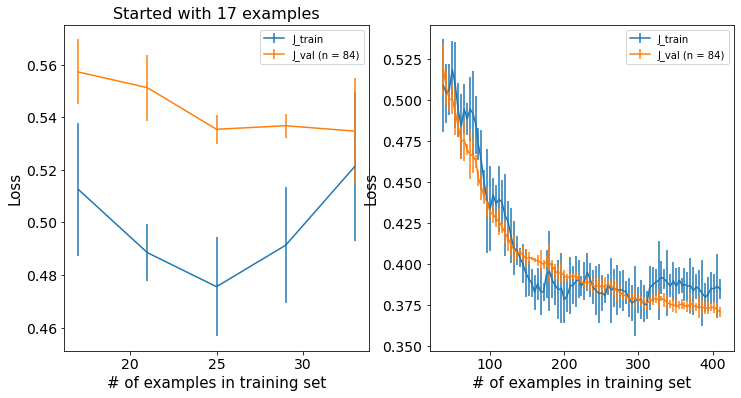

In [24]:
x_train_orig, x_val_orig, y_train_orig, y_val_orig= train_test_split(x_train_pca, y_train, test_size = 0.20, random_state = 10, stratify=y_train)
data_ratio = max_data_ratio(n_splits, x_train_pca, y_train)

J_train = np.zeros((2,len(data_ratio)))
J_val = np.zeros((2,len(data_ratio)))

for idx, curr_ratio in enumerate(data_ratio):
    log_reg = LogisticRegression(solver='saga', random_state=5, penalty='l2', C=0.1, max_iter=2000)
    h = 0 # index per split
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits)
    m_x_train, _, m_y_train, _ = train_test_split(x_train_orig, y_train_orig, test_size =1-curr_ratio, random_state = 10,
                                             stratify=y_train_orig)
    for train_index, val_index in skf.split(m_x_train, m_y_train):
        x_train_fold = m_x_train[train_index]
        y_train_fold = m_y_train[train_index]
        x_train_fold = scaler.fit_transform(x_train_fold)
        x_val = scaler.transform(x_val_orig)

        log_reg.fit(x_train_fold, y_train_fold)
        y_pred_train = log_reg.predict_proba(x_train_fold)
        J_train_fold[h] = log_loss(y_train_fold,y_pred_train)
        y_pred_val = log_reg.predict_proba(x_val)
        J_val_fold[h] = log_loss(y_val_orig,y_pred_val) 
        h += 1
        
        J_train[0, idx] = J_train_fold.mean()
        J_train[1, idx] = J_train_fold.std()
        J_val[0, idx] = J_val_fold.mean()
        J_val[1, idx] = J_val_fold.std()

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].errorbar(np.ceil(data_ratio[0:5]*x_train.shape[0]), J_train[0,0:5], yerr=J_train[1,0:5])
axes[0].errorbar(np.ceil(data_ratio[0:5]*x_train.shape[0]), J_val[0,0:5], yerr=J_val[1,0:5])
axes[0].set_xlabel('# of examples in training set')
axes[0].set_ylabel('Loss')
axes[0].legend(['J_train', 'J_val (n = ' + str(x_val.shape[0]) + ')'])
axes[0].set_title('Started with ' + str(int(np.ceil(data_ratio[0]*x_train.shape[0]))) + ' examples')
axes[1].errorbar(np.ceil(data_ratio[5:]*x_train.shape[0]), J_train[0,5:], yerr=J_train[1,5:])
axes[1].errorbar(np.ceil(data_ratio[5:]*x_train.shape[0]), J_val[0,5:], yerr=J_val[1,5:])
axes[1].set_xlabel('# of examples in training set')
axes[1].set_ylabel('Loss')
axes[1].legend(['J_train', 'J_val (n = ' + str(x_val.shape[0]) + ')'])

In [25]:
svc = SVC(probability=True)
C = np.array([0.01, 1, 10, 100, 1000])

pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_lin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['linear']},cv=skf,
                       scoring=['accuracy','f1','precision','recall','roc_auc'], 
                       refit='roc_auc', verbose=3, return_train_score=True)
svm_lin.fit(x_train_pca, y_train)
best_svm_lin = svm_lin.best_estimator_
print(svm_lin.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.835, test=0.810), f1=(train=0.859, test=0.837), precision=(train=0.908, test=0.891), recall=(train=0.815, test=0.788), roc_auc=(train=0.917, test=0.928), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.808, test=0.845), f1=(train=0.841, test=0.860), precision=(train=0.858, test=0.976), recall=(train=0.824, test=0.769), roc_auc=(train=0.907, test=0.915), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.823, test=0.798), f1=(train=0.851, test=0.828), precision=(train=0.885, test=0.854), recall=(train=0.820, test=0.804), roc_auc=(train=0.925, test=0.869), total=   0.1s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.824, test=0.819), f1=(train=0.851, test=0.845), precision=(train=0.889, test=0.891), recall=(train=0.816, test=0.804), roc_auc=(train=0.913, test=0.925), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.815, test=0.795), f1=(train=0.840, test=0.838), precision=(train=0.896, test=0.815), recall=(train=0.791, test=0.863), roc_auc=(train=0.909, test=0.930), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.853, test=0.845), f1=(train=0.879, test=0.869), precisio

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   10.1s finished


In [31]:
svc = SVC(probability=True)
C = np.array([0.01, 1, 10, 100, 1000])

pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_nonlin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'],
                                                      'svm__gamma': ['auto', 'scale']},
                       scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                       refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin.fit(x_train_pca, y_train)
best_svm_nonlin = svm_nonlin.best_estimator_
print(svm_nonlin.best_params_)
svm_nonlin.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] svm__C=0.01, svm__gamma=auto, svm__kernel=rbf ...................
[CV]  svm__C=0.01, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.922, test=0.913), total=   0.0s
[CV] svm__C=0.01, svm__gamma=auto, svm__kernel=rbf ...................
[CV]  svm__C=0.01, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.910, test=0.909), total=   0.1s
[CV] svm__C=0.01, svm__gamma=auto, svm__kernel=rbf ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.01, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.617, test=0.607), f1=(train=0.763, test=0.756), precision=(train=0.617, test=0.607), recall=(train=1.000, test=1.000), roc_auc=(train=0.922, test=0.881), total=   0.1s
[CV] svm__C=0.01, svm__gamma=auto, svm__kernel=rbf ...................
[CV]  svm__C=0.01, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.917, test=0.917), total=   0.0s
[CV] svm__C=0.01, svm__gamma=auto, svm__kernel=rbf ...................
[CV]  svm__C=0.01, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.912, test=0.928), total=   0.1s
[CV] svm__C=0.01, svm__gamma=auto, svm__kernel=poly ..................
[CV]  svm__C=0.01, svm__gamma=auto, svm__kernel=poly, accuracy=(train=

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


{'svm__C': 100.0, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}

In [27]:
rfc = Pipeline(steps=[('scale', StandardScaler()), ('rfc', RandomForestClassifier(max_depth=4, random_state=0, criterion='gini'))])
rfc.fit(x_train_pca, y_train

Pipeline(steps=[('scale', StandardScaler()),
                ('rfc', RandomForestClassifier(max_depth=4, random_state=0))])

In [28]:
#Logostic regression:
x_tr = scaler.fit_transform(x_train_pca)
x_tst = scaler.transform(x_test_pca)
log_reg.fit(x_tr, y_train)
y_pred_test_lr = log_reg.predict(x_tst)
y_pred_proba_test_lr = log_reg.predict_proba(x_tst)
loss = log_loss(y_test, y_pred_test_lr)
TN = calc_TN(y_test, y_pred_test_lr)
TP = calc_TP(y_test, y_pred_test_lr)
FN = calc_FN(y_test, y_pred_test_lr)
FP = calc_FP(y_test, y_pred_test_lr)
PPV = TP/(TP+FP)
Se = TP/(TP+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*PPV*Se)/(PPV+Se)
print('PCA- Logistic regression:')
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test_lr[:,1])))
print(f'F1 is {F1:.2f}')
print(f'Loss is {loss:.2f}')
print(f'Accuracy is {Acc:.2f}')

PCA- Logistic regression:
AUROC is 0.901
F1 is 0.85
Loss is 6.25
Accuracy is 0.82


In [29]:
#linear SVM:
y_pred_test_svm_lin = best_svm_lin.predict(x_test_pca)
y_pred_proba_test_svm_lin = best_svm_lin.predict_proba(x_test_pca)
loss = log_loss(y_test, y_pred_proba_test_svm_lin)

TN = calc_TN(y_test, y_pred_test_svm_lin)
TP = calc_TP(y_test, y_pred_test_svm_lin)
FN = calc_FN(y_test, y_pred_test_svm_lin)
FP = calc_FP(y_test, y_pred_test_svm_lin)
PPV = TP/(TP+FP)
Se = TP/(TP+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*PPV*Se)/(PPV+Se)
print('PCA- Linear SVM:')
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test_svm_lin[:,1])))
print(f'F1 is {F1:.2f}')
print(f'Loss is {loss:.2f}')
print(f'Accuracy is {Acc:.2f}')

PCA- Linear SVM:
AUROC is 0.910
F1 is 0.85
Loss is 0.39
Accuracy is 0.82


In [32]:
#Non-linear SVM
y_pred_test_svm_nonlin = best_svm_nonlin.predict(x_test_pca)
y_pred_proba_test_svm_nonlin = best_svm_nonlin.predict_proba(x_test_pca)
loss = log_loss(y_test, y_pred_proba_test_svm_nonlin)
svm_params = svm_nonlin.best_params_
chosen_kernel = svm_params['svm__kernel']

TN = calc_TN(y_test, y_pred_test_svm_nonlin)
TP = calc_TP(y_test, y_pred_test_svm_nonlin)
FN = calc_FN(y_test, y_pred_test_svm_nonlin)
FP = calc_FP(y_test, y_pred_test_svm_nonlin)
PPV = TP/(TP+FP)
Se = TP/(TP+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*PPV*Se)/(PPV+Se)
print(f'PCA- Non-linear SVM - {chosen_kernel}:')
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test_svm_nonlin[:,1])))
print(f'F1 is {F1:.2f}')
print(f'Loss is {loss:.2f}')
print(f'Accuracy is {Acc:.2f}')

PCA - Non-linear SVM - rbf:
AUROC is 0.946
F1 is 0.87
Loss is 0.29
Accuracy is 0.85


In [33]:
#Random Forest:
y_pred_test_rfc = rfc.predict(x_test_pca)
y_pred_proba_test_rfc = rfc.predict_proba(x_test_pca)

TN = calc_TN(y_test, y_pred_test_rfc)
TP = calc_TP(y_test, y_pred_test_rfc)
FN = calc_FN(y_test, y_pred_test_rfc)
FP = calc_FP(y_test, y_pred_test_rfc)
PPV = TP/(TP+FP)
Se = TP/(TP+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*PPV*Se)/(PPV+Se)
print(f'PCA- Random Forest:')
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test_rfc[:,1])))
print(f'F1 is {F1:.2f}')
print(f'Loss is {loss:.2f}')
print(f'Accuracy is {Acc:.2f}')

PCA - Random Forest:
AUROC is 0.952
F1 is 0.90
Loss is 0.29
Accuracy is 0.88


##### section e: 